# Analisis Database dengan SQL : Pengembangan Aplikasi Buku Pada Saat Pandemi Virus Corona

# Pendahuluan <a id='intro'></a>

Dampak dari merebaknya virus corona telah mengubah cara masyarakat berinteraksi secara global. Saat ini, kita melihat pergeseran ke arah lebih banyak waktu dihabiskan di dalam rumah, menggantikan aktivitas sosial di tempat-tempat umum seperti kafe atau mal. Sebagai tanggapan terhadap transformasi ini, banyak startup telah memulai pengembangan aplikasi-inovatif yang diarahkan untuk memenuhi kebutuhan baru masyarakat. Sebagai bagian dari inisiatif ini, kita diberikan akses ke sebuah basis data yang mencakup informasi terkait buku, penerbit, penulis, serta penilaian dan ulasan dari pengguna. Data ini menjadi landasan kritis dalam perancangan strategi penawaran harga untuk produk-produk inovatif yang sedang kita garap.


# Tujuan <a id='GoalSet'></a>

Tujuan dari proyek ini adalah untuk melakukan analisis data menggunakan SQL terhadap database buku guna mendapatkan wawasan yang berharga terkait dengan industri buku dalam konteks pandemi yaitu:

1. Menjelaskan tujuan dari studi lakukan.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀥󠀳
2. Mempelajari tabelnya (tampilkan baris-baris pertamanya).󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀦󠀳
3. Membuat kueri SQL untuk setiap tugas.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀧󠀳
4. Menampilkan hasil dari setiap queri tersebut pada notebook.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀨󠀳
5. Menjelaskan kesimpulan untuk setiap tugas.


# Tahapan <a id='Stages'></a>

Berikut beberapa tahapan yang akan kita lakukan yaitu:

1. Menghitung jumlah buku yang dirilis setelah tanggal 1 Januari 2000.󠀲󠀡󠀠󠀦󠀥󠀩󠀠󠀩󠀳
2. Menghitung jumlah ulasan pengguna dan rating rata-rata untuk setiap buku.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀠󠀳
3. Mengidentifikasi Penerbit yang Telah Menerbitkan Jumlah Buku Terbanyak dengan Jumlah Halaman Lebih dari 50󠀡 (hal ini akan membantu kita dalam mengecualikan brosur dan publikasi serupa dari hasil analisis).󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀡󠀳
4. Mengidentifikasi Penulis dengan Rating Rata-Rata Buku Tertinggi: temukan buku dengan rating minimal 5.0.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀢󠀳
5. Menghitung Jumlah Rata-Rata Teks Ulasan di Antara Pengguna yang Memberi Rating Terhadap Lebih dari 50 buku


# Deskripsi Data <a id='description'></a>

**`books`**:

* Berisi data tentang buku:
    * `book_id` — ID buku (**Primary Key** -- int)
    * `author_id` — ID penulis (**Foreign Key** -- int)
    * `title` — judul buku (varchar)
    * `num_pages` — jumlah halaman (int)
    * `publication_date` — tanggal penerbitan (datetime)
    * `publisher_id` — ID penerbit (**Foreign Key** -- int)
    
**`authors`**:

* Berisi data tentang penulis:
    * `author_id` — ID penulis (**Primary Key** -- int)
    * `author` — nama penulis (varchar)

**`publishers`**:

* Berisi data tentang penerbit:
    * `publisher_id` — ID penerbit (**Primary Key** -- int)
    * `publisher` — nama penerbit (varchar)

**`ratings**`:

* Berisi data tentang rating pengguna:
    * `rating_id` — ID rating (**Primary Key** -- int)
    * `book_id` — ID buku (**Foreign Key** -- int)
    * `username` — nama pengguna yang memberi rating buku (varchar)
    * `rating` (int)

**`reviews`**:

* Berisi data tentang ulasan pelanggan:
    * `review_id` — ID ulasan (int)
    * `book_id` — ID buku (**Foreign Key** -- int)
    * `username` — nama pengguna yang mengulas buku (varchar)
    * `text` — teks ulasan (varchar)

# 1. Inisialisasi

* Import library dan kepentingan yang dibutuhkan

In [ ]:
# Mengimport library yang diperlukan
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# configurasi database
db_config = {'user': 'practicum_student',         # nama pengguna
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # kata sandi
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # port koneksi
             'db': 'data-analyst-final-project-db'}          # nama database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [ ]:
# query test
query = "SELECT * FROM authors"
result = pd.io.sql.read_sql(query, con=engine)
result

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


# 2. Menghitung Jumlah Buku yang Dirilis Setelah Tanggal 1 Januari 2000󠀲󠀡󠀠󠀦󠀥󠀩󠀠󠀩󠀳

* Kita akan mempelajari struktur tabelnya dan menghitung jumlah buku yang dirilis pada tanggal yang telah ditentukan. Kita akan mengeksekusi query SQL untuk menghitung jumlah buku yang dirilis setelah tanggal 1 Januari 2000

In [ ]:
# Melakukan query untuk tabel books
query_lists_all_books = "SELECT * FROM books"
result_lists_all_books = pd.read_sql(query_lists_all_books, con=engine)
result_lists_all_books.info()
result_lists_all_books.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


**<font color="green">Temuan</font>**

* Tidak terdapat nilai yang hilang untuk tabel tersebut.

In [ ]:
# Melakukan query untuk menghitung jumlah buku saja pada tanggal 1 Januari tahun 2000
query_count_all_book = """
        SELECT COUNT(*)
        FROM books
        WHERE publication_date > '2000-01-01';
        """
result_count_all_book = pd.io.sql.read_sql(query_count_all_book, con=engine)
result_count_all_book

,count
0,819


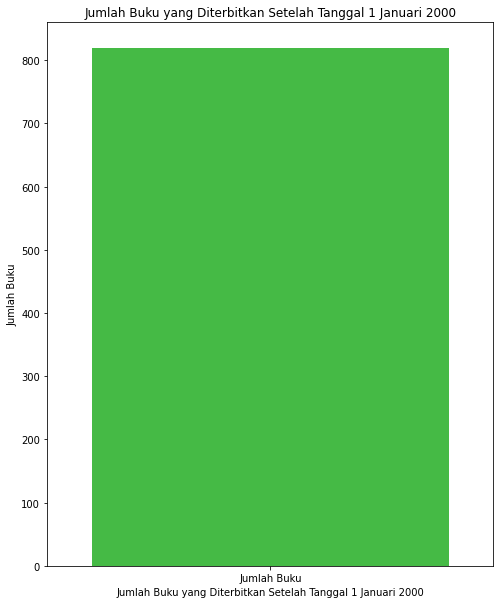

In [ ]:
# Data dari hasil query diatas
sum_of_books = result_count_all_book.iloc[0, 0]

# Plot
plt.figure(figsize=(8, 10))
sns.barplot(x=["Jumlah Buku"], y=[sum_of_books], color='limegreen')
plt.xlabel("Jumlah Buku yang Diterbitkan Setelah Tanggal 1 Januari 2000")
plt.ylabel("Jumlah Buku")
plt.title("Jumlah Buku yang Diterbitkan Setelah Tanggal 1 Januari 2000")
plt.show()

**<font color="green">Kesimpulan Sementara</font>**

* Kita telah menampilkan jumlah 10 baris pertama untuk jumlah buku setelah rilis dari tanggal 1 Januari tahun 2000. Jumlah buku yang ada adalah 819

# 3. Menghitung Jumlah Ulasan Pengguna & Rating Rata-Rata untuk Setiap Buku

* Menghitung jumlah ulasan pengguna dan rating rata-rata untuk setiap buku.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀠󠀳 Dalam query SQL ini, kita menggabungkan data dari tabel books, ratings, dan reviews, dan kemudian menghitung jumlah ulasan dan rating rata-rata untuk setiap buku menggunakan fungsi agregasi COUNT() dan AVG(). Hasilnya kemudian disimpan dalam DataFrame dan 10 baris pertamanya ditampilkan.

In [ ]:
# Melakukan script query SQL
query_reviews_ratings_each_book = """SELECT b.book_id,
       COUNT(DISTINCT rv.review_id) AS num_reviews,
       AVG(r.rating) AS avg_rating
       FROM books b
       LEFT JOIN ratings r ON b.book_id = r.book_id
       LEFT JOIN reviews rv ON b.book_id = rv.book_id
       GROUP BY b.book_id
       ORDER BY b.book_id;
        """
result_query_reviews_ratings_each_book = pd.read_sql(query_reviews_ratings_each_book, con = engine)
result_query_reviews_ratings_each_book.info()
result_query_reviews_ratings_each_book.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   book_id      1000 non-null   int64  
 1   num_reviews  1000 non-null   int64  
 2   avg_rating   1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,book_id,num_reviews,avg_rating
0,1,2,3.666667
1,2,1,2.500000
2,3,3,4.666667
3,4,2,4.500000
4,5,4,4.000000
5,6,4,3.500000
6,7,3,3.000000
7,8,3,4.000000
8,9,2,4.250000
9,10,3,3.200000


**<font color="green">Temuan</font>**

* Tidak ada nilai yang hilang pada tabel tersebut.

In [ ]:
# Menulis query untuk filter kolom title, avg_rating dan review_count

query_rating_reviews = """
    SELECT
        books.title,
        subquery.avg_rating AS avg_rating,
        subquery.review_count
    FROM
        (
            SELECT
                reviews.book_id as book_id,
                COUNT(DISTINCT reviews.review_id) AS review_count,
                AVG(ratings.rating) AS avg_rating
            FROM
                reviews
                INNER JOIN ratings ON ratings.book_id = reviews.book_id
            GROUP BY
                reviews.book_id
            ORDER BY
                review_count DESC,
                avg_rating DESC
        ) AS subquery
    INNER JOIN books ON subquery.book_id = books.book_id
    ORDER BY
        review_count DESC,
        avg_rating DESC
    LIMIT 20
"""

result_ratings_reviews = pd.read_sql(query_rating_reviews, con=engine)
result_ratings_reviews

,title,avg_rating,review_count
0,Twilight (Twilight #1),3.662500,7
1,Harry Potter and the Prisoner of Azkaban (Harr...,4.414634,6
2,Harry Potter and the Chamber of Secrets (Harry...,4.287500,6
3,The Book Thief,4.264151,6
4,The Glass Castle,4.206897,6
5,The Hobbit or There and Back Again,4.125000,6
6,Outlander (Outlander #1),4.125000,6
7,The Curious Incident of the Dog in the Night-Time,4.081081,6
8,The Lightning Thief (Percy Jackson and the Oly...,4.080645,6
9,Water for Elephants,3.977273,6


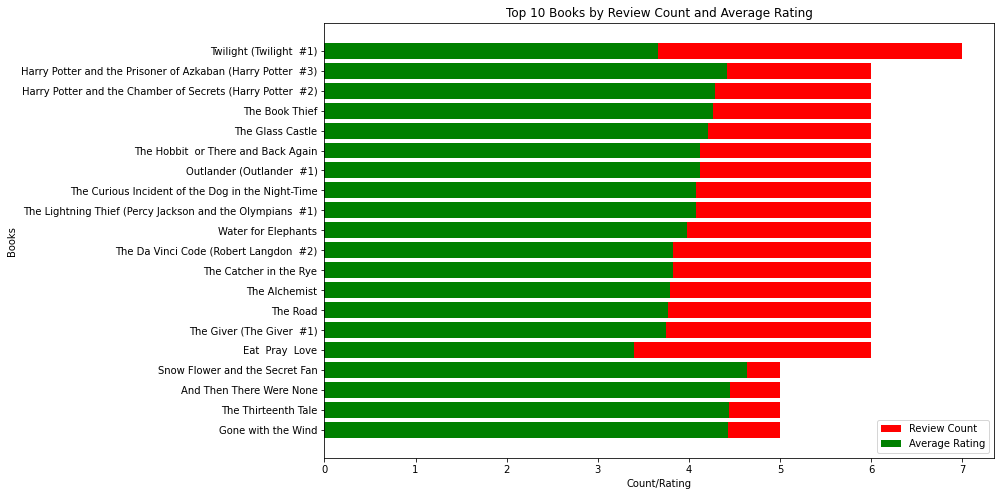

In [ ]:
# Membuat visualisasi top 10 buku berdasarkan review count dan average rating
plt.figure(figsize=(12, 8))
plt.barh(result_ratings_reviews['title'], result_ratings_reviews['review_count'], color='red', label='Review Count')
plt.barh(result_ratings_reviews['title'], result_ratings_reviews['avg_rating'], color='green', label='Average Rating')

plt.xlabel('Count/Rating')
plt.ylabel('Books')
plt.title('Top 10 Books by Review Count and Average Rating')
plt.legend()
plt.gca().invert_yaxis()  # Membalik urutan agar yang teratas menjadi yang pertama
plt.show()

**<font color="green">Kesimpulan Sementara</font>**

* Dari bagian mengenai Ulasan Pengguna dan Rating Rata-Rata untuk Setiap Buku, kita memfilter 10 Buku, buku dengan judul `Harry Potter and the Prisoner of Azkaban` memiliki rata-rata rating paling tinggi meskipun rata-rata jumlah reviewer yang hitung berkisar 6. Hal ini memungkinkan kesan dari buku tersebut sangatlah bagus. Sementara itu `Twilight` menempati posisi rata-rata rating terendah meskipun memiliki jumlah review di atas 6.

# 4. Mengidentifikasi Penerbit yang Telah Menerbitkan Jumlah Buku Terbanyak dengan Jumlah Halaman Lebih dari 50󠀡

* Didalam query ini, kita menggabungkan data dari `tabel publishers` dan `books` untuk menghitung jumlah buku yang telah diterbitkan oleh setiap penerbit. Kemudian, kita memfilter buku-buku dengan jumlah halaman lebih dari 50 menggunakan `klausa WHERE`. Hasilnya `dikelompokkan berdasarkan publisher_id dan publisher`, dan `diurutkan berdasarkan jumlah buku secara descending (DESC)`. Kita juga menggunakan LIMIT 3 untuk mendapatkan 3 penerbit dengan jumlah buku terbanyak.

In [ ]:
# Melakukan query untuk mendapatkan 3 penerbit dengan jumlah buku terbanyak
query_book_publisher_all = """SELECT p.publisher_id,
       p.publisher,
       COUNT(*) AS num_books
       FROM publishers p
       JOIN books b ON p.publisher_id = b.publisher_id
       GROUP BY p.publisher_id, p.publisher
       ORDER BY num_books DESC;"""
result_query_book_publisher_all = pd.read_sql(query_book_publisher_all, con = engine)
result_query_book_publisher_all.info()
result_query_book_publisher_all.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
 2   num_books     340 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.1+ KB


,publisher_id,publisher,num_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,33,Ballantine Books,19
5,35,Bantam,19
6,45,Berkley,17
7,284,St. Martin's Press,14
8,46,Berkley Books,14
9,333,William Morrow Paperbacks,13


**<font color="green">Temuan</font>**

* Tidak ada nilai yang hilang pada tabel tersebut.

In [ ]:
# Membuat query untuk menampilkan TOP 3 : Penerbit dengan Jumlah Buku Terbanyak (dengan halaman > 50)
query_book_publisher = """SELECT p.publisher_id,
       p.publisher,
       COUNT(*) AS num_books
       FROM publishers p
       JOIN books b ON p.publisher_id = b.publisher_id
       WHERE b.num_pages > 50
       GROUP BY p.publisher_id, p.publisher
       ORDER BY num_books DESC
       LIMIT 3;"""
result_query_book_publisher = pd.read_sql(query_book_publisher, con=engine)
result_query_book_publisher

,publisher_id,publisher,num_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25


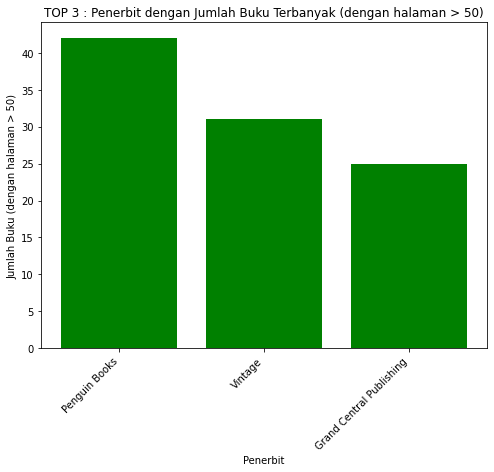

In [ ]:
# data dari hasil query
book_publisher_name = result_query_book_publisher['publisher']
num_books = result_query_book_publisher['num_books']

# plot
plt.figure(figsize=(8, 6))
plt.bar(book_publisher_name, num_books, color='green')
plt.xlabel("Penerbit")
plt.ylabel("Jumlah Buku (dengan halaman > 50)")
plt.title("TOP 3 : Penerbit dengan Jumlah Buku Terbanyak (dengan halaman > 50)")
plt.xticks(rotation=45, ha='right')
plt.show()

**<font color="green">Kesimpulan Sementara</font>**

* Kita telah mengiris publisher yang memiliki jumlah halaman yang lebih dari 50. Ada `3 teratas Publisher dan buku` yang tercatat memiliki `lebih dari 50 halaman` yaitu (`Penguin Books, Vintage, Grand Central Publishing`).

# 5. Mengidentifikasi Penulis dengan Rating Rata-Rata Buku Tertinggi

* Pada bagian ini kita akan menemukan buku dengan rating minimal 5.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀢󠀳 Dalam query ini, kita melakukan JOIN antara tabel authors, books, dan ratings untuk menggabungkan data dari ketiga tabel tersebut. Kemudian kita menggunakan klausa GROUP BY untuk mengelompokkan data berdasarkan author_id dan author, dan menghitung rating rata-rata buku untuk setiap penulis. Kita kemudian menggunakan klausa HAVING untuk membatasi hasil hanya pada penulis dengan rating rata-rata buku minimal 5. Hasilnya diurutkan berdasarkan rating rata-rata buku secara descending.

In [ ]:
# Memeriksa kelengkapan gabungan database
query_books_authors_ratings_all = """
    SELECT a.author_id,
           a.author,
           AVG(r.rating) AS avg_rating
    FROM authors a
    JOIN books b ON a.author_id = b.author_id
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY a.author_id, a.author
    ORDER BY avg_rating DESC;
"""

result_query_books_authors_ratings_all = pd.read_sql(query_books_authors_ratings_all, con=engine)
result_query_books_authors_ratings_all.info()
result_query_books_authors_ratings_all.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   author_id   636 non-null    int64  
 1   author      636 non-null    object 
 2   avg_rating  636 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.0+ KB


,author_id,author,avg_rating
0,562,Susan Hill/John Lawrence,5.0
1,347,Kerry Patterson/Joseph Grenny/Ron McMillan/Al ...,5.0
2,84,Charles Dickens,5.0
3,389,Marguerite Henry/Wesley Dennis,5.0
4,419,Mike Carey/Glenn Fabry/Neil Gaiman,5.0
5,412,Michael Lewis,5.0
6,250,James Clavell,5.0
7,399,Mark Twain/Shelly Fisher Fishkin,5.0
8,79,Chaim Potok,5.0
9,450,Nikolai Gogol/Robert A. Maguire/Zlatko Crnković,5.0


**<font color="green">Temuan</font>**

* Tidak ada nilai yang hilang pada tabel tersebut.

In [ ]:
# Memfilter penulis dengan rating rata-rata buku tertinggi
query_books_authors_ratings = """
SELECT
    a.author AS author_name,
    AVG(subq_b.avg_rating) AS avg_rating
FROM
    books b
INNER JOIN
    authors a ON a.author_id = b.author_id
INNER JOIN
    (SELECT
        b.book_id,
        COUNT(r.rating_id) AS ratings_num,
        AVG(r.rating) AS avg_rating
     FROM
         books b
INNER JOIN
         ratings r ON r.book_id = b.book_id
    GROUP BY
         b.book_id
    HAVING
         COUNT(r.rating_id) > 50
    ) AS subq_b ON subq_b.book_id = b.book_id

GROUP BY
    author_name
ORDER BY
    avg_rating DESC

"""

result_query_books_authors_ratings = pd.read_sql(query_books_authors_ratings, con = engine)
result_query_books_authors_ratings

,author_name,avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645
5,William Golding,3.901408
6,J.D. Salinger,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879
9,Dan Brown,3.754540


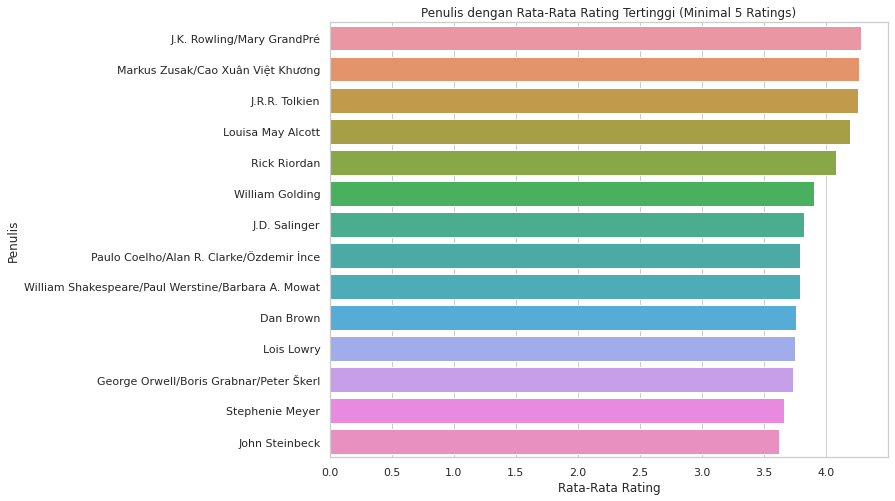

In [ ]:
# Membuat diagram BarPlot untuk Penulis dengan Rata-Rata Rating Tertinggi (Minimal 5 Ratings)
sns.set(style="whitegrid")
sns.set_color_codes("muted")
plt.figure(figsize=(10, 8))
sns.barplot(x='avg_rating', y='author_name', data=result_query_books_authors_ratings)
plt.xlabel("Rata-Rata Rating")
plt.ylabel("Penulis")
plt.title("Penulis dengan Rata-Rata Rating Tertinggi (Minimal 5 Ratings)")
plt.show()

**<font color="green">Kesimpulan Sementara</font>**

* Kita akan mengambil `3 sample tertinggi` dari seluruh sample yang kita tampilkan. `Penulis dengan rata-rata rating tertinggi` yaitu `J.K. Rowling/Mary GrandPré` dengan nilai yang tidak berbedah jauh oleh penulis `Markus Zusak/Cao Xuân Việt Khương` serta `J.R.R. Tolkien`. `John Steinbeck` menempati posisi terendah untuk kategori penulis dengan rata-rata rating tertinggi.

# 6. Menghitung Jumlah Rata-Rata Teks Ulasan di Antara Pengguna yang Memberi Rating Terhadap Lebih dari 50 buku

* Melakukan JOIN langsung antara tabel reviews dan ratings, kemudian mengelompokkan berdasarkan pengguna dan menghitung jumlah rata-rata teks ulasan diantara pengguna yang memberi rating terhadap lebih dari 50 buku.

In [ ]:
# Memeriksa kelengkapan gabungan data
query_users_reviews_ratings_all = """SELECT AVG(CHAR_LENGTH(r.text)) AS avg_review_length
      FROM reviews r
      JOIN ratings ra ON r.username = ra.username
      GROUP BY r.username;"""
result_users_reviews_ratings_all = pd.read_sql(query_users_reviews_ratings_all, con = engine)
result_users_reviews_ratings_all.info()
result_users_reviews_ratings_all.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_review_length  160 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


,avg_review_length
0,86.238095
1,67.000000
2,81.263158
3,96.333333
4,101.250000
5,85.761905
6,106.736842
7,100.857143
8,85.400000
9,92.555556


**<font color="green">Temuan</font>**

* Tidak ada nilai yang hilang pada tabel tersebut.

In [ ]:
# Mennulis query untuk rata-rata teks ulasan antara pengguna yang memberi rating terhadap lebih dari 50 buku

query_avg_users_reviews_books = """
SELECT AVG(review_count) AS total_avg_review_count
FROM (
    SELECT COUNT(r.text) AS review_count
    FROM reviews r
    WHERE r.username IN (
        SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(book_id) > 50
    )
    GROUP BY r.username
) AS subquery;

"""
result_avg_users_reviews_books = pd.read_sql(query_avg_users_reviews_books, con = engine)
result_avg_users_reviews_books

,total_avg_review_count
0,24.333333


**<font color="green">Kesimpulan Sementara</font>**

* `Total rata-rata review` terhadap lebih dari 50 buku mencapai angka `24.33`.

# 7. Kesimpulan Umum

* Kita telah menampilkan jumlah 20 baris pertama untuk jumlah buku setelah dirilis dari tanggal 1 Januari tahun 2000. Jumlah buku yang terdapat adalah 819.
* Dari `bab Ulasan Pengguna dan Rating Rata-Rata untuk Setiap Buku`, kita memfilter 20 Buku, buku dengan judul `Harry Potter and the Prisoner of Azkaban` memiliki `rata-rata rating paling tinggi` meskipun rata-rata jumlah reviewer yang hitung berkisar 6. Hal ini memungkinkan kesan dari buku tersebut sangatlah bagus. Sementara itu `Twilight` menempati posisi `rata-rata rating terendah` meskipun memiliki jumlah review di atas 6.
* Kita telah mengiris publisher yang memiliki jumlah halaman yang lebih dari 50. Ada `3 teratas Publisher dan buku` yang tercatat memiliki `lebih dari 50 halaman` yaitu (`Penguin Books, Vintage, Grand Central Publishing`).
* Kita akan mengambil `3 sample tertinggi` dari seluruh sample yang kita tampilkan. `Penulis dengan rata-rata rating tertinggi` yaitu `J.K. Rowling/Mary GrandPré` dengan nilai yang tidak berbedah jauh oleh penulis `Markus Zusak/Cao Xuân Việt Khương` serta `J.R.R. Tolkien`. `John Steinbeck` menempati posisi terendah untuk kategori penulis dengan rata-rata rating tertinggi.
* `Total rata-rata review` terhadap lebih dari 50 buku mencapai angka `24.33`.